In [1]:
import warnings


random_state = 42
warnings.filterwarnings("ignore")

# Data Processing

In [2]:
import pandas as pd


train_df = pd.read_csv("train.csv")
X_train = train_df.iloc[:, 1:-1]
y_train_reg = train_df.iloc[:, -1]
y_train_cla = train_df.iloc[:, -1].map(lambda x: 1 if x >= 85 else 0)

# Missing value Analysis
print("Missing Values:")
print(train_df.isnull().sum())

# Label distribution
print("Number of positive labels:", y_train_cla.sum())
print("Number of negative labels:", len(y_train_cla) - y_train_cla.sum())

train_df

Missing Values:
ID                             0
Material                       0
Type                           0
Shape                          0
Coat/Functional Group       1102
Synthesis_Method               0
Surface_Charge                 0
Cell_Type                      0
No_of_Cells (cells/well)       0
Human_Animal                   0
Cell_Source                    0
Cell_Tissue                    0
Cell_Morphology                0
Cell_Age                       0
Cell Line_Primary Cell         0
Time (hr)                      0
Concentration (ug/ml)          0
Test                           0
Test_Indicator                 0
Size                           0
Zeta                           0
Target                         0
dtype: int64
Number of positive labels: 910
Number of negative labels: 865


,ID,Material,Type,Shape,Coat/Functional Group,Synthesis_Method,Surface_Charge,Cell_Type,No_of_Cells (cells/well),Human_Animal,...,Cell_Morphology,Cell_Age,Cell Line_Primary Cell,Time (hr),Concentration (ug/ml),Test,Test_Indicator,Size,Zeta,Target
0,472,Pt,I,Sphere,PVP,Chemical Reduction,Negative,IMR90,5000.0,H,...,Fibroblast,Adult,L,24,25.0,CellTiterGlo,LuciferaseEnzyme,4.00,-8.00,98.293
1,232,Au,I,Sphere,CYS,Chemical Reduction,Negative,L929,5000.0,A,...,Fibroblast,Adult,L,24,50.0,MTT,TetrazoliumSalt,25.76,-46.80,90.476
2,2041,EudragitRL,O,Sphere,NaN,Emulsion-Solvent Evaporation,Positive,THP-1,5000.0,H,...,Monocyte,Adult,L,24,25.0,MTT,TetrazoliumSalt,142.00,56.00,123.470
3,437,Au,I,Sphere,Citrate,Chemical Reduction,Negative,Jurkat,500000.0,H,...,Lymphoblast,Adult,L,24,1.5,MTT,TetrazoliumSalt,7.00,-99.00,89.391
4,68,SLN,O,Sphere,NaN,Emulsion-Solvent Evaporation,Negative,A549,100000.0,H,...,Epithelial,Adult,L,24,3671.1,NRU,TetrazoliumSalt,98.40,-14.60,29.601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,611,Dendrimer,O,Sphere,C12,Commercial,Positive,hNPC,100000.0,H,...,Neuronal,Embryonic,P,72,1.0,MTT,TetrazoliumSalt,4.50,54.47,110.620
1771,479,ZnO,I,Sphere,NaN,Commercial,Positive,HCMEC,50000.0,H,...,Epithelial,Adult,P,12,0.1,MTT,TetrazoliumSalt,45.30,32.70,100.330
1772,732,C70,C,Sphere,NaN,Commercial,Negative,V79,10000.0,A,...,Fibroblast,Adult,L,24,5.0,MTT,TetrazoliumSalt,57.00,-35.00,92.898
1773,1184,Polystyrene,O,Sphere,COOH,Commercial,Negative,HeLa,5000.0,H,...,Epithelial,Adult,L,48,5.0,CCK-8,TetrazoliumSalt,50.00,-9.00,105.980


In [3]:
test_df = pd.read_csv("test.csv")
X_test = test_df.iloc[:, 1:]

# Missing Value Analysis
print("Missing Values:")
print(test_df.isnull().sum())

X_test

Missing Values:
ID                            0
Material                      0
Type                          0
Shape                         0
Coat/Functional Group       475
Synthesis_Method              0
Surface_Charge                0
Cell_Type                     0
No_of_Cells (cells/well)      0
Human_Animal                  0
Cell_Source                   0
Cell_Tissue                   0
Cell_Morphology               0
Cell_Age                      0
Cell Line_Primary Cell        0
Time (hr)                     0
Concentration (ug/ml)         0
Test                          0
Test_Indicator                0
Size                          0
Zeta                          0
dtype: int64


,Material,Type,Shape,Coat/Functional Group,Synthesis_Method,Surface_Charge,Cell_Type,No_of_Cells (cells/well),Human_Animal,Cell_Source,Cell_Tissue,Cell_Morphology,Cell_Age,Cell Line_Primary Cell,Time (hr),Concentration (ug/ml),Test,Test_Indicator,Size,Zeta
0,Ag,I,Sphere,Citrate,Commercial,Negative,CCL-110,5000,H,Human,Skin,Fibroblast,Fetus,P,24,0.50,MTS,TetrazoliumSalt,39.94,-23.5
1,Chitosan,O,Irregular,NaN,Ionotropic Gelation Method,Positive,MBMC,10000,A,Mouse,BoneMarrow,Spindle,Adult,P,72,31.25,MTT,TetrazoliumSalt,475.20,71.3
2,NiO,I,Sphere,NaN,Commercial,Positive,HepG2,10000,H,Human,Liver,Epithelial,Adult,L,24,100.00,MTS,TetrazoliumSalt,21.60,25.3
3,TiO2,I,Sphere,NaN,Commercial,Negative,A549,30000,H,Human,Lung,Epithelial,Adult,L,48,10.00,MTT,TetrazoliumSalt,81.80,-8.6
4,Chitosan,O,Irregular,NaN,Ionotropic Gelation Method,Positive,MBMC,10000,A,Mouse,BoneMarrow,Spindle,Adult,P,24,1000.00,MTT,TetrazoliumSalt,384.60,62.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,Au,I,Sphere,CYS,Chemical Reduction,Negative,L929,5000,A,Mouse,SubcutaneousConnectiveTissue,Fibroblast,Adult,L,24,5.00,MTT,TetrazoliumSalt,25.76,-46.8
758,MWCNT,C,Nanotube,NaN,Commercial,Neutral,HUVEC,40000,H,Human,Umbilical Vein,Endothelial,Embryonic,P,24,32.00,NRU,NeutralRed,17.60,0.9
759,PLGA,O,Sphere,Chitosan,Emulsion-Solvent Evaporation,Positive,Colo_205,10000,H,Human,Colon,Epithelial,Adult,L,24,1250.00,MTS,TetrazoliumSalt,204.00,10.0
760,C60,C,Sphere,Dextran,Commercial,Negative,C6,10000,A,Rat,Brain,Fibroblast,Adult,L,24,25.00,MTT,TetrazoliumSalt,30.00,-16.9


## Missing Values

In [ ]:
# Fill missing values with mode
def fill_missing_values(X_train, X_test, method: str = "mode") -> tuple:
    if method == "mean":
        mean_value = X_train.mean()
        X_train.fillna(mean_value, inplace=True)
        X_test.fillna(mean_value, inplace=True)
    elif method == "median":
        median_value = X_train.median()
        X_train.fillna(median_value, inplace=True)
        X_test.fillna(median_value, inplace=True)
    elif method == "mode":
        for col in X_train.columns:
            mode_value = X_train[col].mode()[0]
            X_train[col].fillna(mode_value, inplace=True)
            X_test[col].fillna(mode_value, inplace=True)
    else:
        raise ValueError("Invalid method. Choose 'mean', 'median', or 'mode'.")
    return X_train, X_test


print(f"Number of missing values in train set: {X_train.isnull().sum().sum()}")
print(f"Number of missing values in test set: {X_test.isnull().sum().sum()}")
# X_train, X_test = fill_missing_values(X_train, X_test, method="mode")
print(f"Number of missing values in train set: {X_train.isnull().sum().sum()}")
print(f"Number of missing values in test set: {X_test.isnull().sum().sum()}")

Number of missing values in train set: 1102
Number of missing values in test set: 475
Number of missing values in train set: 0
Number of missing values in test set: 0


## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


def scale_data(X_train, X_test, method, columns=None) -> tuple:
    if method == "standard":
        scaler = StandardScaler()
    elif method == "minmax":
        scaler = MinMaxScaler()
    else:
        raise ValueError("Invalid scaling method. Choose 'standard' or 'minmax'.")

    if columns is None:
        columns = X_train.select_dtypes(include=["int", "float"]).columns.tolist()

    X_train[columns] = scaler.fit_transform(X_train[columns])
    X_test[columns] = scaler.transform(X_test[columns])

    return X_train, X_test


# X_train, X_test = scale_data(X_train, X_test, method="standard")
# X_train, X_test = scale_data(X_train, X_test, method="minmax")

X_train.head(5)

,Material,Type,Shape,Coat/Functional Group,Synthesis_Method,Surface_Charge,Cell_Type,No_of_Cells (cells/well),Human_Animal,Cell_Source,Cell_Tissue,Cell_Morphology,Cell_Age,Cell Line_Primary Cell,Time (hr),Concentration (ug/ml),Test,Test_Indicator,Size,Zeta
0,Pt,I,Sphere,PVP,Chemical Reduction,Negative,IMR90,5000.0,H,Human,Lung,Fibroblast,Adult,L,24,25.0,CellTiterGlo,LuciferaseEnzyme,4.00,-8.0
1,Au,I,Sphere,CYS,Chemical Reduction,Negative,L929,5000.0,A,Mouse,SubcutaneousConnectiveTissue,Fibroblast,Adult,L,24,50.0,MTT,TetrazoliumSalt,25.76,-46.8
2,EudragitRL,O,Sphere,Citrate,Emulsion-Solvent Evaporation,Positive,THP-1,5000.0,H,Human,Blood,Monocyte,Adult,L,24,25.0,MTT,TetrazoliumSalt,142.00,56.0
3,Au,I,Sphere,Citrate,Chemical Reduction,Negative,Jurkat,500000.0,H,Human,Blood,Lymphoblast,Adult,L,24,1.5,MTT,TetrazoliumSalt,7.00,-99.0
4,SLN,O,Sphere,Citrate,Emulsion-Solvent Evaporation,Negative,A549,100000.0,H,Human,Lung,Epithelial,Adult,L,24,3671.1,NRU,TetrazoliumSalt,98.40,-14.6


## Feature Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, TargetEncoder


def encode_categorical(X_train, X_test, method, columns=None) -> tuple:
    if method == "label":
        encoder = LabelEncoder()
    elif method == "onehot":
        encoder = OneHotEncoder(sparse_output=False, drop="first")
    elif method == "target":
        encoder = TargetEncoder(random_state=random_state)
    else:
        raise ValueError("Invalid encoding method. Choose 'label', 'onehot', or 'target'.")

    if columns is None:
        columns = X_train.select_dtypes(include=["object"]).columns.tolist()
    other_columns = X_train.select_dtypes(exclude=["object"]).columns.tolist()

    if method == "label":
        for col in columns:
            X_train[col] = encoder.fit_transform(X_train[col])
            X_test[col] = encoder.transform(X_test[col])
    elif method == "onehot":
        X_train_encoded = encoder.fit_transform(X_train[columns])
        X_test_encoded = encoder.transform(X_test[columns])
        X_train = pd.concat(
            [X_train.drop(columns, axis=1), pd.DataFrame(X_train_encoded)],
            axis=1,
        )
        X_train.columns = other_columns + encoder.get_feature_names_out(columns).tolist()
        X_test = pd.concat(
            [X_test.drop(columns, axis=1), pd.DataFrame(X_test_encoded)],
            axis=1,
        )
        X_test.columns = X_train.columns
    else:
        X_train_encoded = encoder.fit_transform(X_train[columns], y_train_reg)
        X_test_encoded = encoder.transform(X_test[columns])
        X_train = pd.concat(
            [X_train.drop(columns, axis=1), pd.DataFrame(X_train_encoded)],
            axis=1,
        )
        X_train.columns = other_columns + columns
        X_test = pd.concat(
            [X_test.drop(columns, axis=1), pd.DataFrame(X_test_encoded)],
            axis=1,
        )
        X_test.columns = X_train.columns

    return X_train, X_test

X_train, X_test = encode_categorical(X_train, X_test, method="label")
# X_train, X_test = encode_categorical(X_train, X_test, method="onehot")
# X_train, X_test = encode_categorical(X_train, X_test, method="target")

X_train

,Material,Type,Shape,Coat/Functional Group,Synthesis_Method,Surface_Charge,Cell_Type,No_of_Cells (cells/well),Human_Animal,Cell_Source,Cell_Tissue,Cell_Morphology,Cell_Age,Cell Line_Primary Cell,Time (hr),Concentration (ug/ml),Test,Test_Indicator,Size,Zeta
0,20,1,6,23,1,0,26,5000.0,1,2,15,2,0,0,24,25.0,3,4,4.00,-8.00
1,2,1,6,4,1,0,31,5000.0,0,4,22,2,0,0,24,50.0,8,7,25.76,-46.80
2,11,2,6,6,6,2,46,5000.0,1,2,2,7,0,0,24,25.0,8,7,142.00,56.00
3,2,1,6,6,1,0,28,500000.0,1,2,2,5,0,0,24,1.5,8,7,7.00,-99.00
4,21,2,6,6,6,0,4,100000.0,1,2,15,1,0,0,24,3671.1,9,7,98.40,-14.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,9,2,6,1,4,2,53,100000.0,1,2,4,10,1,1,72,1.0,8,7,4.50,54.47
1771,25,1,6,6,4,2,14,50000.0,1,2,12,1,0,1,12,0.1,8,7,45.30,32.70
1772,4,0,6,6,4,0,49,10000.0,0,1,15,2,0,0,24,5.0,8,7,57.00,-35.00
1773,19,2,6,2,4,0,24,5000.0,1,2,6,1,0,0,48,5.0,1,7,50.00,-9.00


## Outliers Handling

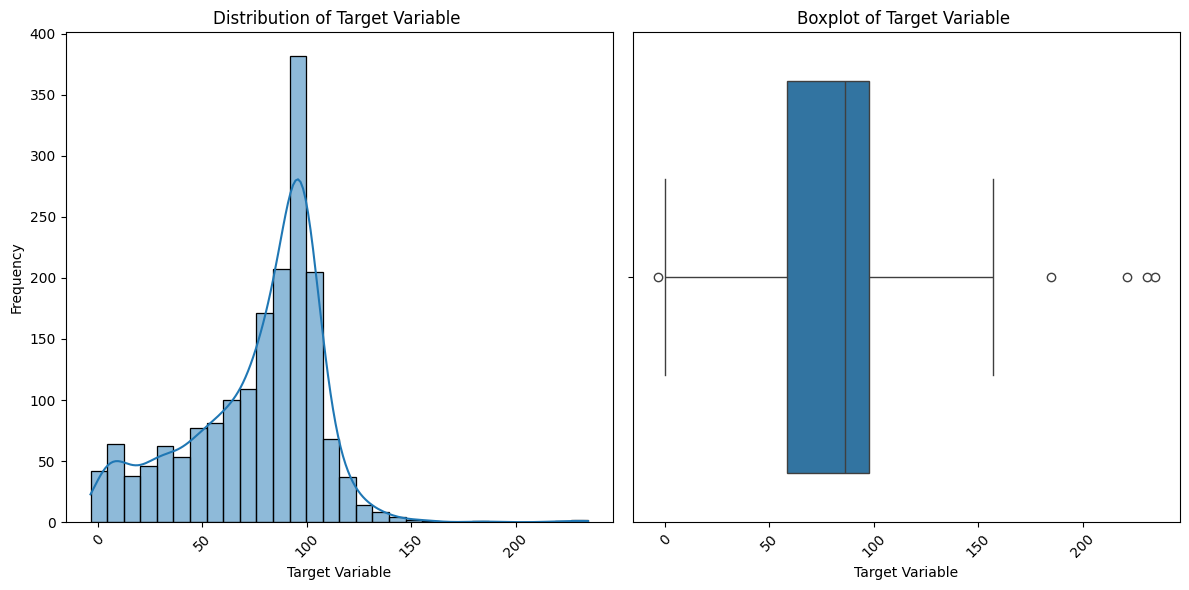

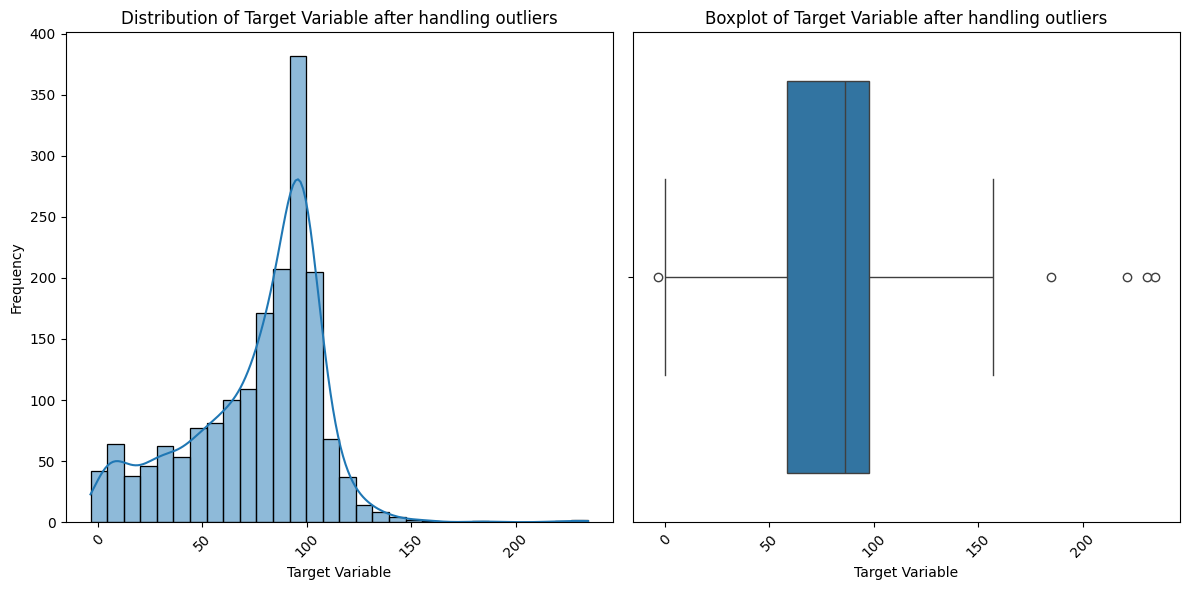

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_distribution(y, subfix) -> None:

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)

    sns.histplot(y, kde=True, bins=30)
    plt.title(f"Distribution of Target Variable {subfix}")
    plt.xlabel("Target Variable")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=y)
    plt.title(f"Boxplot of Target Variable {subfix}")
    plt.xlabel("Target Variable")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


def handle_outliers(
    X: pd.DataFrame,
    y_reg: pd.Series,
    y_cla: pd.Series,
    detection_method: str = "IQR",
    handling_method: str = "clipping",
) -> tuple:
    if detection_method == "IQR":
        q1 = y_reg.quantile(0.25)
        q3 = y_reg.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
    elif detection_method == "z-score":
        mean = y_reg.mean()
        std = y_reg.std()
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
    else:
        raise ValueError("Invalid detection method. Choose 'IQR' or 'z-score'.")

    if handling_method == "clipping":
        y_reg = y_reg.clip(lower_bound, upper_bound)
    elif handling_method == "trimming":
        mask = (y_reg >= lower_bound) & (y_reg <= upper_bound)
        X = X[mask]
        y_reg = y_reg[mask]
        y_cla = y_cla[mask]
    else:
        raise ValueError("Invalid handling method. Choose 'clipping' or 'trimming'.")

    return X, y_reg, y_cla


plot_distribution(y_train_reg, "")
# X_train, y_train_reg, y_train_cla = handle_outliers(
#     X_train, y_train_reg, y_train_cla,
#     # detection_method="IQR",
#     detection_method="z-score",
#     # handling_method="clipping",
#     handling_method="trimming",
# )
plot_distribution(y_train_reg, "after handling outliers")

## Dimensionality Reduction

In [8]:
from sklearn.decomposition import PCA


def pca_analysis(
    X_train: pd.DataFrame,
    X_test: pd.DataFrame,
    columns: list,
    n_components: int,
) -> tuple:

    if len(columns) <= 1:
        X_train = X_train.drop(columns=columns)
        X_test = X_test.drop(columns=columns)
    else:
        pca = PCA(n_components=n_components)
        new_columns = [f"PC{i+1}" for i in range(n_components)]

        X_train = pd.concat(
            [
                X_train.drop(columns=columns),
                pd.DataFrame(pca.fit_transform(X_train[columns]), columns=new_columns)
            ],
            axis=1,
        )

        X_test = pd.concat(
            [
                X_test.drop(columns=columns),
                pd.DataFrame(pca.transform(X_test[columns]), columns=new_columns)
            ],
            axis=1,
        )
    
    return X_train, X_test


print("Feature sets before DR:", (X_train.shape, X_test.shape))
columns = [
    # "Surface_Charge",
    # "Human_Animal",
    # "Cell_Age",
    # "Cell Line_Primary Cell",
]
X_train, X_test = pca_analysis(X_train, X_test, columns=columns, n_components=len(columns)-1)
print("Feature sets after DR:", (X_train.shape, X_test.shape))
print("Number of NaN values in train set:", X_train.isna().sum().sum())
print("Number of NaN values in test set:", X_test.isna().sum().sum())

X_train

Feature sets before DR: ((1775, 20), (762, 20))
Feature sets after DR: ((1775, 20), (762, 20))
Number of NaN values in train set: 0
Number of NaN values in test set: 0


,Material,Type,Shape,Coat/Functional Group,Synthesis_Method,Surface_Charge,Cell_Type,No_of_Cells (cells/well),Human_Animal,Cell_Source,Cell_Tissue,Cell_Morphology,Cell_Age,Cell Line_Primary Cell,Time (hr),Concentration (ug/ml),Test,Test_Indicator,Size,Zeta
0,20,1,6,23,1,0,26,5000.0,1,2,15,2,0,0,24,25.0,3,4,4.00,-8.00
1,2,1,6,4,1,0,31,5000.0,0,4,22,2,0,0,24,50.0,8,7,25.76,-46.80
2,11,2,6,6,6,2,46,5000.0,1,2,2,7,0,0,24,25.0,8,7,142.00,56.00
3,2,1,6,6,1,0,28,500000.0,1,2,2,5,0,0,24,1.5,8,7,7.00,-99.00
4,21,2,6,6,6,0,4,100000.0,1,2,15,1,0,0,24,3671.1,9,7,98.40,-14.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,9,2,6,1,4,2,53,100000.0,1,2,4,10,1,1,72,1.0,8,7,4.50,54.47
1771,25,1,6,6,4,2,14,50000.0,1,2,12,1,0,1,12,0.1,8,7,45.30,32.70
1772,4,0,6,6,4,0,49,10000.0,0,1,15,2,0,0,24,5.0,8,7,57.00,-35.00
1773,19,2,6,2,4,0,24,5000.0,1,2,6,1,0,0,48,5.0,1,7,50.00,-9.00


# Model Training

In [9]:
import numpy as np
from tabpfn import TabPFNRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, matthews_corrcoef


def evaluate(model, X, y_cla, y_reg=None) -> tuple:
    """
    Evaluates the model using R2 and Matthews correlation coefficient.
    """
    y_pred = np.round(model.predict(X), 4)

    if y_reg is None:
        mcc = matthews_corrcoef(y_cla, y_pred)
        print(f"- MCC Score: {mcc:.4f}")
        return mcc, None

    y_pred_cla = [1 if pred >= 85 else 0 for pred in y_pred]
    mcc = matthews_corrcoef(y_cla, y_pred_cla)
    print(f"- MCC Score: {mcc:.4f}")
    r2 = r2_score(y_reg, y_pred)
    print(f"- R2 Score: {r2:.4f}")
    return mcc, r2


model = TabPFNRegressor(random_state=random_state)
k_fold = KFold(n_splits=5, shuffle=True, random_state=random_state)

r2_scores = []
mcc_scores = []

for fold, (train_idx, val_idx) in enumerate(k_fold.split(X_train)):
    print(f"Fold {fold + 1} " + "-" * 20)
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_reg_fold, y_val_reg_fold = y_train_reg.iloc[train_idx], y_train_reg.iloc[val_idx]
    y_train_cla_fold, y_val_cla_fold = y_train_cla.iloc[train_idx], y_train_cla.iloc[val_idx]
    print(f"Train set size: {X_train_fold.shape}, Validation set size: {X_val_fold.shape}")

    model.fit(X_train_fold, y_train_reg_fold)

    mcc, r2 = evaluate(model, X_val_fold, y_val_cla_fold, y_val_reg_fold)
    mcc_scores.append(mcc)
    r2_scores.append(r2)

print("Average results " + "-" * 20)
print(f"- MCC Score: {np.mean(mcc_scores):.4f}")
print(f"- R2 Score: {np.mean(r2_scores):.4f}")

model.fit(X_train, y_train_reg)

Fold 1 --------------------
Train set size: (1420, 20), Validation set size: (355, 20)
- MCC Score: 0.7846
- R2 Score: 0.8431
Fold 2 --------------------
Train set size: (1420, 20), Validation set size: (355, 20)
- MCC Score: 0.7476
- R2 Score: 0.8244
Fold 3 --------------------
Train set size: (1420, 20), Validation set size: (355, 20)
- MCC Score: 0.7227
- R2 Score: 0.7802
Fold 4 --------------------
Train set size: (1420, 20), Validation set size: (355, 20)
- MCC Score: 0.8208
- R2 Score: 0.8511
Fold 5 --------------------
Train set size: (1420, 20), Validation set size: (355, 20)
- MCC Score: 0.8026
- R2 Score: 0.8012
Average results --------------------
- MCC Score: 0.7757
- R2 Score: 0.8200


TabPFNRegressor(random_state=42)

# Model Interpretation

In [10]:
# from sklearn.ensemble import RandomForestRegressor


# model = RandomForestRegressor(random_state=random_state)
# model.fit(X_train, y_train_reg)

# evaluate(model, X_train, y_train_cla, y_train_reg)

# importances = model.feature_importances_
# indices = np.argsort(importances)[::-1]
# plt.figure(figsize=(12, 6))
# plt.title("Feature Importances")
# plt.bar(range(X_train.shape[1]), importances[indices], align="center")
# plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
# plt.xlim([-1, X_train.shape[1]])
# plt.tight_layout()
# plt.show()

# Inference

In [ ]:
y_pred = model.predict(X_test)

exp_group = "missing_values"
exp_name = "mode"

submission = pd.DataFrame({"ID": test_df["ID"], "Target": y_pred})
submission["Target"] = submission["Target"].astype(float).round(4)
submission.to_csv(f"../results/{exp_group}/r_{exp_name}.csv", index=False)
submission

,ID,Target
0,32,101.9355
1,376,102.7221
2,71,60.3687
3,2232,76.3821
4,2018,107.7516
...,...,...
757,2356,104.8165
758,64,93.5037
759,649,94.7289
760,1484,80.6912
